# Mutual Information

### Set initial settings

In [1]:
import sys
import warnings

# Add base directory in path
sys.path.append('../../')

# Ignore future warning
warnings.filterwarnings("ignore", category=FutureWarning)

### Import libs

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np
import pandas as pd
from src.ml import experiment
from src.plot import plot_by_feature_selection_method

### Load original data

In [3]:
# Set a random seed
np.random.seed(7)

# Read the dataset
dataset = pd.read_csv("../../data/df_original_100000.csv")

# Extract the labels
y = np.array(dataset["Label"])
del dataset["Label"]

# Define X (Features)
X = np.array(dataset)

print(f"Shape Features (X): {X.shape}")
print(f"Shape Features (y): {y.shape}")

result = []

Shape Features (X): (100000, 79)
Shape Features (y): (100000,)


### Feature Selection

In [4]:
k_best = 3

selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_selected = selector.fit_transform(X, y)

print(f"Original Features Shape: {X.shape}")
print(f"New Feature Shape: {X_selected.shape}")

Original Features Shape: (100000, 79)
New Feature Shape: (100000, 3)


### Train models

In [5]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5), 
    "DecisionTree": DecisionTreeClassifier(), 
    "RandomForest":RandomForestClassifier(), 
    "GaussianNB":GaussianNB(var_smoothing=1e-02)
}

In [6]:
final_result = experiment(models=models, X=X_selected, y=y)

KNN Trained
DecisionTree Trained
RandomForest Trained
GaussianNB Trained


### Print and save result file

In [7]:
final_result.to_csv(f"./mutual_information_{k_best}_result.csv", index=False)
final_result

,model,anonymized train,anonymized test,accuracy,precision,recall,f1_score
0,KNN,True,True,99.985%,99.970%,100.000%,99.985%
1,KNN,True,False,99.993%,99.988%,99.998%,99.993%
2,KNN,False,True,99.985%,99.970%,100.000%,99.985%
3,KNN,False,False,99.999%,100.000%,99.998%,99.999%
4,DecisionTree,True,True,93.722%,99.959%,87.480%,93.067%
5,DecisionTree,True,False,94.979%,99.956%,89.994%,94.096%
6,DecisionTree,False,True,99.984%,99.970%,99.998%,99.984%
7,DecisionTree,False,False,99.999%,100.000%,99.998%,99.999%
8,RandomForest,True,True,99.976%,99.952%,100.000%,99.976%
9,RandomForest,True,False,99.427%,99.948%,98.906%,99.419%


### Result Plots

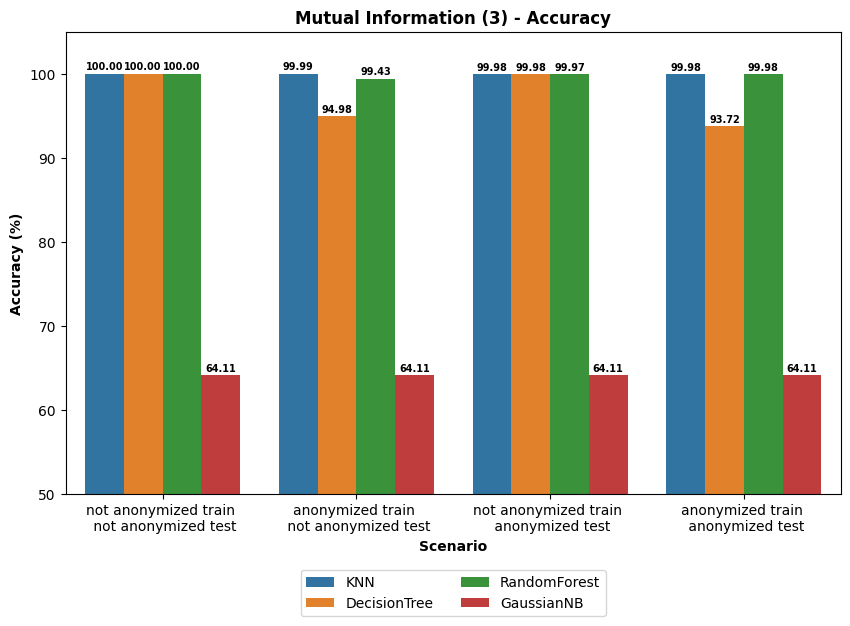

In [8]:
plot_by_feature_selection_method(title=f"Mutual Information ({k_best}) - Accuracy", metric_name="accuracy", dataframe_file_path=f"./mutual_information_{k_best}_result.csv", plot_path=f"./mutual_information_{k_best}_accuracy.png", y_lim_bottom=50)

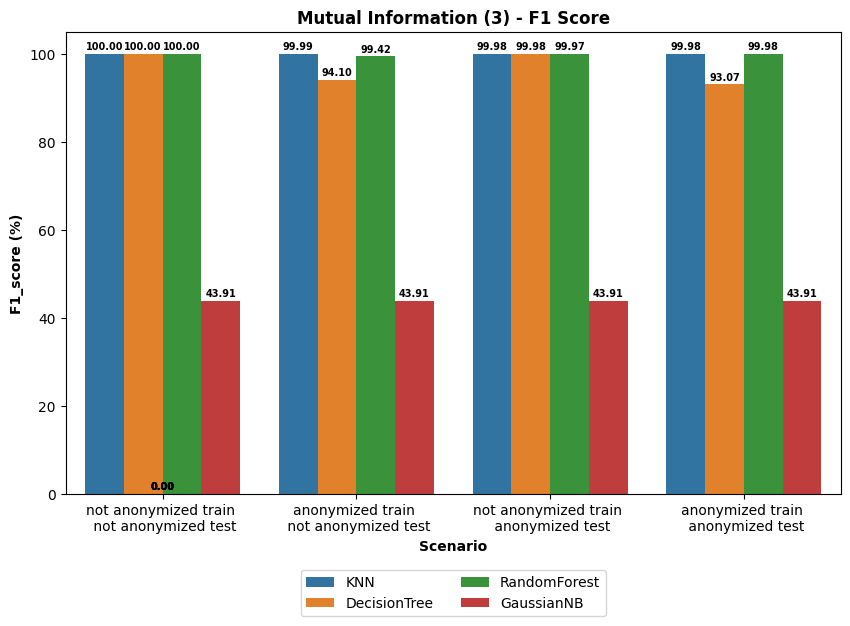

In [9]:
plot_by_feature_selection_method(title=f"Mutual Information ({k_best}) - F1 Score", metric_name="f1_score", dataframe_file_path=f"./mutual_information_{k_best}_result.csv", plot_path=f"./mutual_information_{k_best}_f1_score.png")